<a href="https://colab.research.google.com/github/wrozas/deeplearningclass/blob/master/Perceptron/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptrón

El primer paso de nuestra implementación es importar las librerías necesarias, Numpy y matplotlib

In [13]:
import numpy as np
import matplotlib.pyplot as plt

Ahora vamos a crear la clase perceptrón, y cuya explicación a cada uno de sus métodos lo podrás encontrar en el [blog](https://bryanmed.github.io/perceptron/)

In [14]:
class Perceptron:

    def __init__(self, num_inputs, lr, epochs, pesos=None):
        if pesos:
            self.weights = pesos # en caso de contar con pesos del perceptron cargarlos
        else:
            self.weights = np.random.rand(num_inputs+1) # el peso extra es el bias
            
        self.lr = lr #learning rate
        self.epochs = epochs #num de iteraciones

    def act_fn(self, x, funcion='step'):
        """función de activación """
        if funcion == 'step':    
            return np.where(x>0, 1, 0)
        if funcion == 'sigmoid':
            return 1/(1 + np.exp(-x)) 
        if funcion == 'relu':
            return np.where(x>0, x, 0)
        if funcion == 'tanh':
            return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))


    def predict(self, inputs):
        """feedforward del perceptron"""
        return self.act_fn(np.dot(inputs, self.weights[1:]) + self.weights[0])

    def train(self, in_train, clases, verbose=False):
        """entrenamiento del perceptron"""
        errores = []
        for _ in range(self.epochs):
            e = 0
            for entrada, clase in zip(in_train, clases):
                prediccion = self.predict(entrada)
                error = clase - prediccion
                self.weights[0] += self.lr * error
                self.weights[1:] += self.lr * error * entrada
            
                e += np.abs(error)   
            errores.append(e)
        
        if verbose:
            plt.figure(), plt.plot(errores), plt.title('errores'), plt.show()
                  
    def get_weights(self):
        """recupero los pesos de la red, útil para no volver a entrenar"""
        return self.weights

La tarea que le encomendaremos al perceptrón que aprenda a realizar el que se comporte como una compuerta lógica AND, la cual es:

| $x_1$  | $x_2$  |   $y$|
| ------ |:------:| -:|
| 0      | 0      | 0 |
| 0      | 1      | 0 |
| 1      | 0      | 0 |
| 1      | 1      | 1 |

Lo primero será crear las variables que me representen esta tabla (entradas $x_1, x_2$, salida $y$)

In [15]:
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])

print(x, y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]] [0 0 0 1]



Ahora vamos a inicializar un objeto de la clase `Perceptron` al que llamaremos "perci", para ello necesitamos indicarle el número de entradas que en este caso son 2 (correspondientes a las entradas de la tabla AND) , el learning rate y el número de épocas.

In [16]:
perci = Perceptron(num_inputs=2, lr=0.2, epochs=10)

Como un pequeño ejercicio, veamos el comportamiento de las distintas funciones de activación. Para ello vamos a crear un vector $t$ que será una ventana de tiempo con valores de -1 a 1. Y accederemos al método de `act_fn` para evaluar las distintas funciones de activacion sobre la ventana de tiempo.

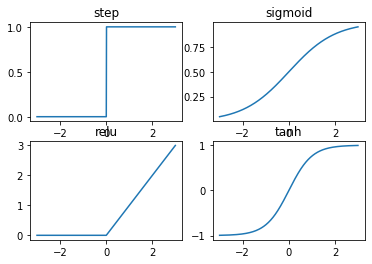

In [17]:
t = np.arange(-3, 3, 0.01) #creamos un vector de -1 a 1

#evaluamos y graficamos este vector con las distintas funciones de activación para ver su comportamiento
plt.figure()
plt.subplot(221), plt.plot(t, perci.act_fn(t, 'step')), plt.title('step')
plt.subplot(222), plt.plot(t, perci.act_fn(t, 'sigmoid')), plt.title('sigmoid')
plt.subplot(223), plt.plot(t, perci.act_fn(t, 'relu')), plt.title('relu')
plt.subplot(224), plt.plot(t, perci.act_fn(t, 'tanh')), plt.title('tanh')
plt.show()


Vamos a corroborar el bias y pesos del perceptrón, los cuales han sido inicializados de manera aleatoria. En donde el primer elemento del array corresponde al bias y los demás a los pesos

In [18]:
print(perci.get_weights())

[0.72871002 0.52108223 0.61068487]


Vamos a realizar una predicción de estos valores

In [19]:
for entradas, label in zip(x, y):
    #zip() returns an iterator of tuples, where the i-th tuple contains the i-th element 
    #from each of the argument sequences or iterables. The iterator stops when the shortest input iterable 
    #is exhausted. With a single iterable argument, it returns an iterator of 1-tuples. 
    #With no arguments, it returns an empty iterator. 
    
  prediccion = perci.predict(entradas)

  print('entradas:', entradas, ' esperado:', label, ' predicción:', prediccion)

entradas: [0 0]  esperado: 0  predicción: 1
entradas: [0 1]  esperado: 0  predicción: 1
entradas: [1 0]  esperado: 0  predicción: 1
entradas: [1 1]  esperado: 1  predicción: 1


Como podemos ver, las predicciones son una desastre! y eso es porque no hemos entrenado la red, así que a ello!

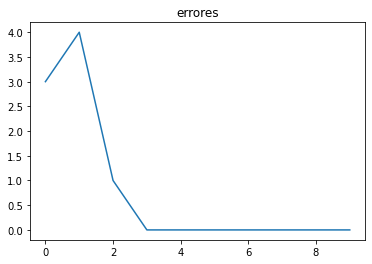

In [20]:
perci.train(x, y, True)

En el gráfico de errores observamos las equivocaciones de la red, hasta que convergió, es decir, que tiene cero errores. Ahora veamos como predice el pequeño perceptrón ya que está entrenada.

In [21]:
for entradas, label in zip(x, y):
  prediccion = perci.predict(entradas)

  print('entradas:', entradas, ' esperado:', label, ' predicción:', prediccion)

entradas: [0 0]  esperado: 0  predicción: 0
entradas: [0 1]  esperado: 0  predicción: 0
entradas: [1 0]  esperado: 0  predicción: 0
entradas: [1 1]  esperado: 1  predicción: 1


Success! Ahora vamos a quedarnos con los pesos de la red entrenada para así evitar volver a entrenarlo la siguiente vez que lo utilicemos. 

In [22]:
perci.get_weights()

array([-0.47128998,  0.32108223,  0.21068487])

In [23]:
pesos = [-0.49665638,  0.45672912,  0.15160198]

perci2 = Perceptron(2, 0.2, 0, pesos=pesos)

print('pesos del perceptron: ', perci2.get_weights())

for entradas, label in zip(x, y):
  prediccion = perci2.predict(entradas)

  print('entradas:', entradas, ' esperado:', label, ' predicción:', prediccion)


pesos del perceptron:  [-0.49665638, 0.45672912, 0.15160198]
entradas: [0 0]  esperado: 0  predicción: 0
entradas: [0 1]  esperado: 0  predicción: 0
entradas: [1 0]  esperado: 0  predicción: 0
entradas: [1 1]  esperado: 1  predicción: 1
